# 1. MNIST Classification 


## 1) Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os 

print(tf.__version__)

2022-01-20 21:08:32.168000: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


2.4.1


## 2) Load Dataset

In [2]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(type(x_train))

(60000, 28, 28)
<class 'numpy.ndarray'>


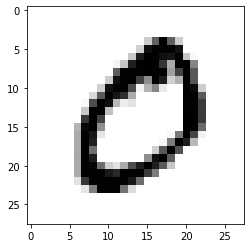

label :  0


In [3]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()
print('label : ',y_train[1])
# print(x_train[1])

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## 2) Nomalization 

In [5]:
print('min : ',np.min(x_train),'max : ',np.max(x_train))

min :  0 max :  255


In [6]:
# 0 ~ 255 scale to 0 ~ 1 scale

x_train_norm, x_test_norm = x_train/255.0, x_test/255.0
print('min : ',np.min(x_train_norm),'max : ',np.max(x_train_norm))

min :  0.0 max :  1.0


In [9]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


## 3) Build Model 

In [7]:
# O = (N+2P-F)/s+1 [ N = 입력 이미지 크기 / P = 패딩 크기 / F = 커널 크기 / S = stride ]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1))) # (26,26,16)
model.add(keras.layers.MaxPool2D(2,2)) # (13,13,16)
model.add(keras.layers.Conv2D(32, (3,3), activation='relu')) # (11,11,32)
model.add(keras.layers.MaxPooling2D((2,2))) #(5,5,32)
model.add(keras.layers.Flatten()) # 5*5*32 = 800
model.add(keras.layers.Dense(32, activation='relu')) # 32 [(1,800)*(800*32)]
model.add(keras.layers.Dense(10, activation='softmax')) # 10 [(1,32)*(32,10)]

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


2022-01-20 21:08:43.121401: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-20 21:08:43.122198: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-20 21:08:43.161928: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 21:08:43.162371: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 computeCapability: 7.5
coreClock: 1.44GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-01-20 21:08:43.162387: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-01-20 21:08:43.163754: I tensorflow/stream_executor/platform/def

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 4) Train 

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

2022-01-20 21:08:45.603546: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-20 21:08:45.623415: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/10


2022-01-20 21:08:45.885608: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-01-20 21:08:46.047873: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


1875/1875 [==============================] - 4s 1ms/step - loss: 0.4072 - accuracy: 0.8761
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0670 - accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0457 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0228 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0185 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0154 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0135 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0113 - accurac

## 5) Inference

In [11]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 0s - loss: 0.0378 - accuracy: 0.9876
test_loss: 0.037804052233695984 
test_accuracy: 0.9876000285148621


In [12]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률 
print(predicted_result.shape)
# (10000, 10)으로 나온것으로 보아 10000개의 이미지에 대한 10개의 클래스에 대한 확률이 담겨 있다. 

predicted_labels = np.argmax(predicted_result, axis=1)
print(predicted_labels.shape)
# 10000개의 이미지에서 가장 확률이 높은 클래스의 index를 담고 있다. 

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

(10000, 10)
(10000,)
model.predict() 결과 :  [1.0243998e-10 1.1601049e-09 8.0788317e-07 1.4619153e-06 5.3660687e-10
 6.5535610e-10 1.5409395e-13 9.9999547e-01 1.4528678e-09 2.3164648e-06]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


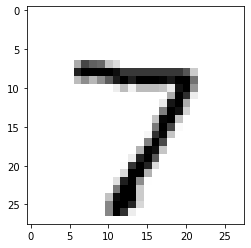

In [13]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.6215885e-06 5.3380904e-09 1.1036398e-10 8.6421785e-09 2.9858453e-11
 3.5992488e-01 1.6751155e-01 1.0531595e-16 4.7256085e-01 6.4880844e-08]
라벨: 6, 예측결과: 8


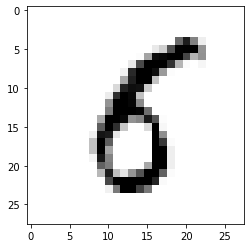

예측확률분포: [4.0519959e-07 3.8393429e-07 1.2404051e-08 1.2536204e-07 1.4073734e-01
 8.7710994e-08 2.4085678e-06 4.7176425e-07 1.7961283e-04 8.5907912e-01]
라벨: 4, 예측결과: 9


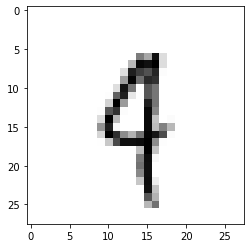

예측확률분포: [9.8916388e-01 1.3737930e-10 6.5140176e-07 3.5502276e-10 2.4088491e-09
 5.3068734e-06 8.3427302e-08 1.7138987e-10 1.0828359e-02 1.6923781e-06]
라벨: 8, 예측결과: 0


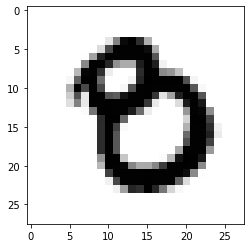

예측확률분포: [1.4996571e-03 7.5476805e-06 3.8298444e-04 1.0612232e-03 4.2202417e-05
 9.4999295e-01 3.2935461e-03 7.2847397e-06 4.3445736e-02 2.6676312e-04]
라벨: 8, 예측결과: 5


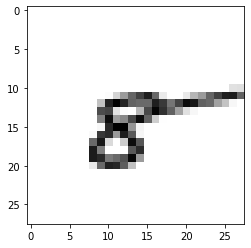

예측확률분포: [2.1440593e-08 1.1706788e-07 5.7108812e-10 4.0712445e-10 2.5999314e-01
 1.6379366e-07 3.1206881e-05 1.8645098e-10 4.3334021e-05 7.3993212e-01]
라벨: 4, 예측결과: 9


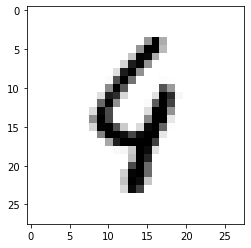

In [14]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 6) Model Tuning 

In [15]:
# 모델 튜닝

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               